In [4]:
import os
import re
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import math
import matplotlib.colors as cx
import matplotlib.cm as cm

from glob import glob
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [5]:
path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies'
outpath = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries'
outfile = os.path.join(outpath, 'snowfly_data.parquet')

fig_folder = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries\grant_figure'

In [5]:
data = pd.DataFrame()
(root, dirs, files) = next(os.walk(path))

for session in dirs: 
    
    session_path = os.path.join(path, session)
    (r, flies, f) = next(os.walk(session_path))
    
    for fly in flies:
        
        fly_path = os.path.join(session_path, fly)
        (r, trials, f) = next(os.walk(fly_path))
        
        for trial in trials: 
            
            trial_path = os.path.join(fly_path, trial, 'temp_data.csv')
            video_path = glob(os.path.join(fly_path, trial, '*.csq'))
            if len(video_path) == 0:
                continue
                
            # print(video_path)
            video_name = os.path.basename(video_path[0])
            if not os.path.exists(trial_path):
                continue
                
            print(trial_path)
             
            trial_num = re.findall(r'\d+', trial)[0]
            trial_data = pd.read_csv(trial_path)
            trial_data['date'] = session
            trial_data['fly'] = fly
            trial_data['trial'] = trial_num
            trial_data['flyid'] = fly + '_' + trial_num
            trial_data['filename'] = video_name
            trial_data['fullfile'] = os.path.join(session, fly, trial, video_name)
            data = data.append(trial_data)
            
# save data to parquet file
data.to_parquet(outfile + '.gzip', compression = 'gzip')

G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\1.3.21\SF0075\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\12.29.20\SF0049\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.1.21\SF0106\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.1.21\SF0105\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.1.21\SF0104\trial2\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.9.21\SF0111\trial2\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.9.21\SF0111\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.9.21\SF0110\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\3.9.21\SF0108\trial1\temp_data.csv
G:\My Drive\Tuthill Lab Sh

In [6]:
data = pd.read_parquet(outfile + '.gzip' , engine='fastparquet')

In [9]:
data.replace(0, np.nan, inplace=True)

In [7]:
def get_video_length(nframes, thresh = None, fps = 30):

    frames = np.arange(0, nframes, 1)
    time_s = frames / fps
    time_m = frames / (fps*60)
    
    if thresh is not None:
        time_s = time_s[:thresh]
        time_m = time_m[:thresh]
         
    return time_s, time_m

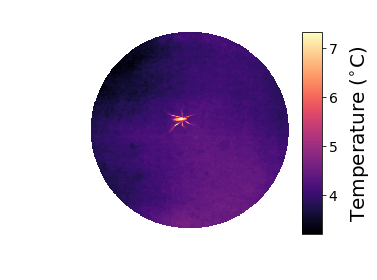

In [9]:
# plot image of snow fly in the arena (include colorbar)

temp_path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries\grant_figure\FLIR0321_sf.csv'
im = pd.read_csv(temp_path, header = None)

mask_path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries\grant_figure\FLIR0321_sf - Ellipse 1.bmp' 
mask = plt.imread(mask_path)
mask = np.array(mask[:, :, 0])
mask[mask > 0] = 1
im_masked = np.multiply(im, mask)

fig = plt.figure()
im_masked[im_masked == 0] = np.nan
max_temp = np.max(np.max(im_masked))
min_temp = np.min(np.min(im_masked))
plt.imshow(im_masked, cmap = 'magma')

ax = plt.gca()
ticks = np.arange(np.floor(min_temp), np.ceil(max_temp), 1)
cbar = plt.colorbar(ticks = ticks, shrink = 0.82, pad = -0.15, aspect = 10)
cbar.set_clim(min_temp, max_temp)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize = 20, labelpad = 10)
cbar.ax.tick_params(labelsize=14)

plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, 'panel_B.svg'), dpi=600, transparent = True)
plt.show()


In [ ]:
# plot image of snow fly in the arena (include colorbar)

temp_path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries\grant_figure\FLIR0321_sf.csv'
im = pd.read_csv(temp_path, header = None)

mask_path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\summaries\grant_figure\FLIR0321_sf - Ellipse 1.bmp' 
mask = plt.imread(mask_path)
mask = np.array(mask[:, :, 0])
mask[mask > 0] = 1
im_masked = np.multiply(im, mask)

fig = plt.figure()
im_masked[im_masked == 0] = np.nan
max_temp = np.max(np.max(im_masked))
min_temp = np.min(np.min(im_masked))
plt.imshow(im_masked)

ax = plt.gca()
ticks = np.arange(np.floor(min_temp), np.ceil(max_temp), 1)
cbar = plt.colorbar(ticks = ticks, shrink = 0.5, aspect = 15, orientation = 'horizontal')
cbar.set_clim(min_temp, max_temp)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize = 14, labelpad = 5)

plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, 'panel_B_horiz.svg'), dpi=600, transparent = True)
plt.show()


C:\Users\Rupp\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Rupp\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Rupp\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


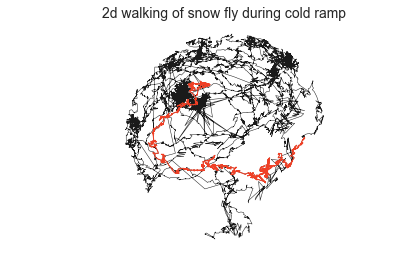

In [246]:
# for each fly, plot the position of the fly in the metal ring

sns.set()
sns.set_style('ticks')
flies = np.unique(data.flyid)
max_frames = 54000
# last_frame = len(t_m)
last_frame = 36000
last_frame = 31505
fps = 30
seconds = 60

# for fly in flies:
fly = 'SF0049_1'
    
fly_data = data[data.flyid == fly]
t_s, t_m = get_video_length(len(fly_data), thresh = max_frames)

trial_path = os.path.dirname(fly_data.fullfile.iloc[0])
# mask_path = os.path.join(path, trial_path, 'mask - Ellipse 1.bmp')
# mask = plt.imread(mask_path)

fig = plt.figure()
ax = plt.gca()
plt.title('2d walking of snow fly during cold ramp', fontsize = 14)
# plt.title(fly)
#plt.xlabel('x position (pixels)')
#plt.ylabel('y position (pixels)')
# ax.imshow(mask)
xs = fly_data.x_filt[:last_frame]
ys = fly_data.y_filt[:last_frame]
ax.plot(ys, xs, 'k', linewidth = 0.5)

start = 13000
d = seconds*fps
ax.plot(fly_data.y_filt[start:start+d], fly_data.x_filt[start:start+d], 'xkcd:tomato', linewidth = 1)
ax.axis('equal')

sns.despine()
ax.invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, 'panel_C.svg'), dpi=600, transparent = True)
plt.show()

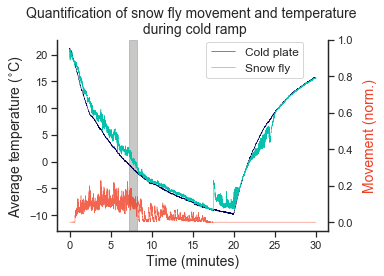

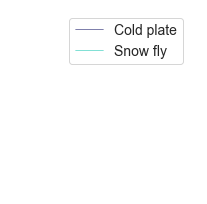

In [281]:
# plot the pixel intensity across time for each fly

final_data_path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\snow_flies\12.29.20\SF0049\trial1\temp_data_final.csv'
final_data = pd.read_csv(final_data_path)

sns.set()
sns.set_style('ticks')
fs = 14
flies = np.unique(data.flyid)
colors = sns.color_palette('mako', 3)

# for j, fly in enumerate(flies):

fly = 'SF0049_1'
    
fig = plt.figure(figsize = (5.5, 4))
ax = plt.gca()
plt.title(fly, fontsize = fs)
plt.title('Quantification of snow fly movement and temperature \n during cold ramp', fontsize = fs)
ax.set_xlabel('Time (minutes)', fontsize = fs)
ax.set_ylabel('Average temperature ($^{\circ}$C)', fontsize = fs)

fly_data = data[data.flyid == fly]
# cp_temp = np.array(fly_data.cold_plate_temp[:len(t_m)])
cp_temp = np.array(final_data.cold_plate_temp[:len(t_m)])
cp_temp[cp_temp == 0] = np.nan 
# fly_temp = np.array(fly_data.avg_temp[:len(t_m)])
fly_temp = np.array(final_data.avg_temp[:len(t_m)])
fly_temp[fly_temp == 0] = np.nan 
t_s, t_m = get_video_length(len(fly_data), thresh = max_frames)    
ax.plot(t_m, cp_temp, color = 'xkcd:dark blue', linewidth = 0.5, label = 'Cold plate')
ax.plot(t_m, fly_temp, color = 'xkcd:turquoise', linewidth = 0.5, label = 'Snow fly')
ax.set_ylim(bottom = -13) 
ax.axvspan(t_m[13000], t_m[14800], alpha=0.5, color='xkcd:grey')

ax2 = ax.twinx()
ax2.set_ylabel('Movement (norm.)', fontsize = fs, labelpad = 10, color = 'xkcd:tomato')
movement_norm = fly_data.movement[:len(t_m)] / max(fly_data.movement[:len(t_m)])
movement_norm[:550] = 0
movement_norm[31475:] = 0
movement_norm = movement_norm * 0.5
ax2.plot(t_m, movement_norm, color = 'xkcd:tomato', linewidth = 0.5, label = 'activity', alpha= 0.8)
ax2.set_ylim([-0.05, 1])

hs, ls = ax.get_legend_handles_labels()
sns.despine(right = False)
plt.tight_layout()
plt.legend(handles = hs, labels = ls, fontsize = 12, bbox_to_anchor = (0.93, 1.02))
plt.savefig(os.path.join(fig_folder, 'panel_D.svg'), dpi=600, transparent = True)
plt.show()

fig = plt.figure(figsize = (3,3))
plt.axis('off')
plt.legend(handles = hs, labels = ls, fontsize = fs)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, 'panel_D_legend.svg'), dpi=600, transparent = True)
plt.show()


In [249]:
path = r'G:\My Drive\Tuthill Lab Shared\Katie\thermal_experiments\data\cold_tolerance_summary - snow flies.csv'
data = pd.read_csv(path)
data = data[data['scp_germanium_temp'].isnull()]
exclude_dates = ['10.30.20', '11.6.20', '11.13.20', '11.20.20', '12.4.20', '12.11.20']
exclude_flies = ['SF0036', 'SF0075']
data = data[~data.date.isin(exclude_dates)]
data = data[~data.fly_id.isin(exclude_flies)]

In [250]:
scp_ambient = data[~data['scp_ambient_temp'].isnull()]['scp_ambient_temp'].astype(float)
scp_fly_pre = data[~data['scp_fly_temp_pre'].isnull()]['scp_fly_temp_pre'].astype(float)
scp_fly_post = data[~data['scp_fly_temp_post'].isnull()]['scp_fly_temp_post'].astype(float)

cc_ambient = data[~data['cc_ambient_temp'].isnull()]['cc_ambient_temp']
cc_fly = data[~data['cc_fly_temp'].isnull()]['cc_fly_temp']
recovery_ambient = data[~data['recovery_ambient_temp'].isnull()]['recovery_ambient_temp']
recovery_fly = data[~data['recovery_fly_temp'].isnull()]['recovery_fly_temp']

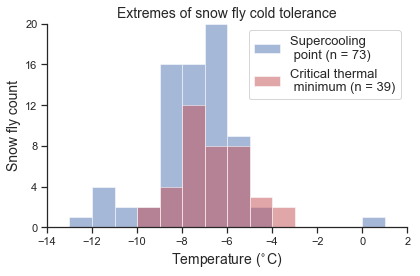

In [251]:
# histograms of chill coma and supercooling 
sns.set()
sns.set_style('ticks')

figure = plt.figure(figsize = (6, 4))
plt.title('Extremes of snow fly cold tolerance', fontsize = 14)
plt.ylabel('Snow fly count', fontsize = 14)
plt.xlabel('Temperature ($^{\circ}$C)', fontsize = 14)
plt.xlim([-14, 2])
plt.ylim([0, 20])

edges = np.arange(-14, 2, 1)
plt.hist(scp_fly_pre, bins = edges, color = 'b', alpha = 0.5, label = 'Supercooling \n point (n = ' + str(len(scp_fly_pre)) + ')')
plt.hist(cc_fly, bins = edges, color = 'r', alpha = 0.5, label = 'Critical thermal \n minimum (n = ' + str(len(cc_fly)) + ')')

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks(ticks = np.arange(0, 21, 4))

plt.legend(fontsize = 13, loc = 'upper right')
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, 'panel_E.svg'), dpi=600, transparent = True)
plt.show()